In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import map_setup
import cartopy.feature as cfeature
import calendar

In [20]:
lter1 = pd.read_csv("../../data/datasets/unmodified/lter2022/AntarcticaLTERcompiledData_Cruise_forEDI.csv")
lter2 = pd.read_csv("../../data/datasets/unmodified/lter2022/AntarcticaLTERcompiledData_Station_forEDI.csv")

lter_sql: dict = {
    'studyName': 'cruise', 'DatetimeGMT': 'date_time', 'Latitude': 'latitude',
    'Longitude': 'longitude', 'Depth': 'depth', 'Temperature': 'temperature',
    'Salinity': 'salinity', 'Oxygen': 'oxygen', 'PAR': 'par',
    'Chlorophyll': 'chl_a_fluor', 'Prasinophytes': 'chemtax_prasinophytes',
    'Cryptophytes': 'chemtax_cryptophytes', 'MixedFlagellates': 'chemtax_mixed_flagellates',
    'Diatoms': 'chemtax_diatoms', 'Haptophytes': 'chemtax_haptophytes',
    'Alloxanthin': 'hplc_allo', 'AlphaCarotene': 'hplc_alpha_car',
    'BetaCarotene': 'hplc_beta_car', 'x19butanoyloxyfucoxanthin': 'hplc_but_fuco',
    'Fucoxanthin': 'hplc_fuco', 'x19hexanoyloxyfucoxanthin': 'hplc_hex_fuco', 
    'Chlorophylla': 'hplc_tot_chl_a','Diadinoxanthin': 'hplc_diadino','Diatoxanthin': 'hplc_diato',
    'Zeaxanthin': 'hplc_zea', 'Chlorophyllc3': 'hplc_chl_c3', 'Chlorophyllide': 'hplc_chlide_a',
    'DivinylChlorophylla': 'hplc_dv_chl_a', 'Lutein': 'hplc_lut', 'Neoxanthin': 'hplc_neo',
    'Prasinoxanthin': 'hplc_pras', 'Violaxanthin': 'hplc_viola', 'Peridinin': 'hplc_perid',
    'Chlorophyllb': 'hplc_tot_chl_b', 'POC': "poc", 'PO4': 'phosphate', 'NO3': 'nitrate',
    'NO2': 'nitrite', 'SiO2': 'silicate', 'DIC1': 'dic' 
}


lter1 = lter1.rename(columns=lter_sql)
lter2 = lter2.rename(columns=lter_sql)
lter = pd.concat([lter1, lter2])

# Know alpha_beta_car is sum of alpha and beta from kramer and siegel paper def. 
lter["hplc_alpha_beta_car"] = lter["hplc_alpha_car"] + lter["hplc_beta_car"]
lter["date_time"] = pd.to_datetime(lter["date_time"])
lter = lter[lter["longitude"].between(-180, 180)]
lter['source_name'] = 'lter2022'
lter["hplc_present"] = 1
lter["chemtax_present"] = 1
lter["microscopy_present"] = 1
lter["ifcb_present"] = 0
lter

,cruise,date_time,JulianDay,Event,GridLine,GridStation,RoundedGridLine,RoundedGridStation,GridRegion,NorthSouthRegion,...,Notes1,Notes2,NominalStation,Chlorophyllc1,hplc_alpha_beta_car,source_name,hplc_present,chemtax_present,microscopy_present,ifcb_present
0,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,*Only T and S available for CTD - from BOPS - ...,NaN,NaN,NaN,NaN,lter2022,1,1,1,0
1,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,"**HPLC in datazoo file listed as ug/L, but act...",NaN,NaN,NaN,NaN,lter2022,1,1,1,0
2,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,lter2022,1,1,1,0
3,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,lter2022,1,1,1,0
4,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,lter2022,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19341,PAL2021,2021-05-04 00:00:00,124.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,E,NaN,NaN,lter2022,1,1,1,0
19342,PAL2021,2021-05-04 00:00:00,124.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,E,NaN,NaN,lter2022,1,1,1,0
19343,PAL2021,2021-05-04 00:00:00,124.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,E,NaN,NaN,lter2022,1,1,1,0
19344,PAL2021,2021-05-04 00:00:00,124.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,E,NaN,NaN,lter2022,1,1,1,0


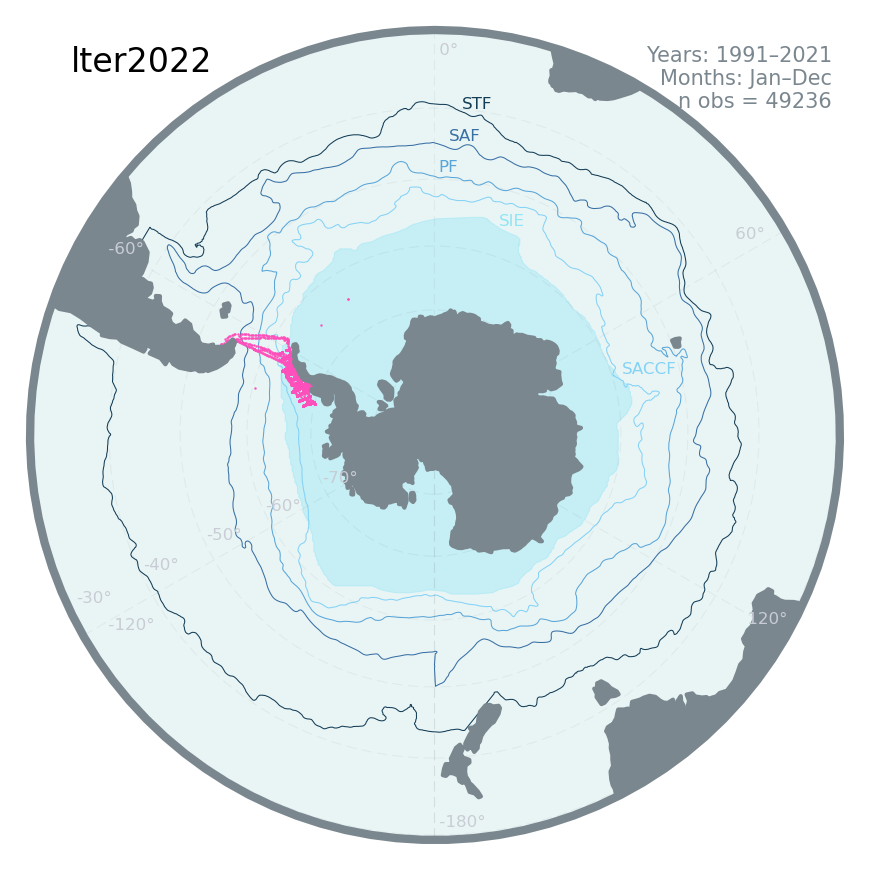

In [21]:
############ DATA TO PLOT ################################################
dataset        = lter
data_longitude = dataset.longitude
data_latitude  = dataset.latitude
############ SET UP PLOT ################################################
#### COLORS
data_point_color = '#FF4FBB'
#### FIGURE SIZE
fig_width  = 3   # inches
fig_height = 3   # inches
markersize = 0.2
#### CREATE FIGURE
fig  = plt.figure(figsize=[fig_width, fig_height], dpi=300) # inches
ax1  = plt.subplot(projection = map_setup.map_proj)
############ CREATE MAP ################################################
# Make map
map_setup.map_southern_ocean_axes_setup(ax1, fig, add_gridlines=True)
# Add fronts to map
map_setup.add_fronts(ax1, add_labels=True, front_linewidth=0.25, fontsize=4)
# Add land after front
ax1.add_feature(cfeature.LAND, zorder=7, linewidth = 1, edgecolor=map_setup.overplot_label_color, facecolor=map_setup.overplot_label_color)
############ ADD DATA TO MAP ################################################
plt.scatter(x=data_longitude, y=data_latitude, c=data_point_color, transform=map_setup.text_proj, zorder=6, s=markersize, linewidths=0.1)
############ FORMAT TITLE ###################################################
# Get source name and number of observations
source_name_title = np.unique(dataset.source_name)[0]
n_obs = len(dataset)
# Find range of years
first_year = dataset["date_time"].dt.year.min().astype(int).astype(str)
last_year  = dataset["date_time"].dt.year.max().astype(int).astype(str)

if first_year != last_year:
    years = first_year + u'\u2013' + last_year
else:
    years = first_year
        
first_month = dataset.date_time.dt.month.min().astype(int)
last_month  = dataset.date_time.dt.month.max().astype(int)

months = calendar.month_abbr[first_month] + u'\u2013' + calendar.month_abbr[last_month]

plt.title(source_name_title, loc='left', x=0.05, y=.95, va='top', fontsize=8)
plt.title('Years: ' + years + '\nMonths: ' + months + '\nn obs = ' + str(n_obs), fontsize=5, loc='right', x=0.99, y=0.95, color=map_setup.overplot_label_color, va='top')
plt.show()

In [22]:
lter.to_csv("../../data/datasets/modified/lter2022/lter2022_sample.csv", index=False)